### 1. Загрузити файл з даними про споживання енергії “En_In.xls”, який являє собою перелік показників енергозабезпечення та виробництва відновлюваної електроенергії, і ввести їх в DataFrame.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_excel
file = 'En_In.xls'

energy = pd.read_excel(file, header = 16)
energy['Country'] = energy['Unnamed: 1']
energy = energy[['Country','Energy Supply', 'Energy Supply per Capita', '% Renewable']][1:228]
energy

,Country,Energy Supply,Energy Supply per Capita,% Renewable
1,Afghanistan,321,10,78.6693
2,Albania,102,35,100
3,Algeria,1959,51,0.55101
4,American Samoa,...,...,0.641026
5,Andorra,9,121,88.6957
...,...,...,...,...
223,Viet Nam,2554,28,45.3215
224,Wallis and Futuna Islands,0,26,0
225,Yemen,344,13,0
226,Zambia,400,26,99.7147


### 2. Переведіть дані із стовпчику ‘Energy Supply’ в гДж (Примітка: в 1ПДж = 1000000 ГДж). Для всіх країн, у яких відсутні дані (наприклад, дані з "....."), переконайтеся, що це відображається як значення np.NaN.

In [9]:
energy = energy.replace(r'\.', np.nan, regex = True)
energy["Energy Supply"] = energy["Energy Supply"] * 1_000_000
energy

,Country,Energy Supply,Energy Supply per Capita,% Renewable
1,Afghanistan,3.210000e+08,10.0,78.669280
2,Albania,1.020000e+08,35.0,100.000000
3,Algeria,1.959000e+09,51.0,0.551010
4,American Samoa,NaN,NaN,0.641026
5,Andorra,9.000000e+06,121.0,88.695650
...,...,...,...,...
223,Viet Nam,2.554000e+09,28.0,45.321520
224,Wallis and Futuna Islands,0.000000e+00,26.0,0.000000
225,Yemen,3.440000e+08,13.0,0.000000
226,Zambia,4.000000e+08,26.0,99.714670


### 3. Перейменуйте наступний список країн:

In [33]:
NewCountry = {'Korea,Rep' : 'South Korea',
             'Iran, Islamic Rep': 'Iran',
             'Iran (Islamic Republic of)': 'Iran',
             'Hong Kong SAR, CHina': 'Hong Kong',
             'Republic of Korea': 'South Korea',
             'United States of America': 'United States',
             'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
             'China, Hong Kong Special Administrative Region': 'Hong Kong'}
energy = energy.replace(NewCountry)

### 4 Існує також декілька країн, що мають в назві цифри та/або дужки. Обов’язково видаліть їх

In [11]:
def correct_country_name(s):
    res = []
    for e in s:
        if e.isdigit():
            continue
        elif e == "(":
            break
        else:
            res.append(e)
    return "".join(res).rstrip()

energy["Country"] = energy["Country"].apply(lambda x: correct_country_name(x))
energy.loc[energy["Country"].isin(["American Samoa", "South Korea", "Bolivia"])]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
4,American Samoa,NaN,NaN,0.641026
25,Bolivia,3.360000e+08,32.0,31.477120
165,South Korea,1.100700e+10,221.0,2.279353


### 5. Далі, завантажте дані про ВВП з файлу „gpd.csv”, що містить дані Світового банку про ВВП країн від 1960 до 2015 року 

In [12]:
gpd = pd.read_csv('gpd.csv',header =4)
gpd = gpd.replace(NewCountry)
gpd = gpd.set_index("Country Name")
gpd= gpd.loc[:,'2006': '2015']
gpd.shape

(264, 10)

### 6. Завантажте дані з файлу „scimagojr.xlsx”, який класифікує країни на основі їхніх публікацій в журналах у галузі енергетичного машинобудування та енергетичних технологій

In [16]:
Scimagojr = pd.read_excel("scimagojr.xlsx")[:15].replace(NewCountry)
Scimagojr

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57
5,6,Canada,17899,17620,215003,40930,12.01,149
6,7,Germany,17027,16831,140566,27426,8.26,126
7,8,India,15005,14841,128763,37209,8.58,115
8,9,France,13153,12973,130632,28601,9.93,114
9,10,South Korea,11983,11923,114675,22595,9.57,104


### 7. Приєднайте три набори даних із завдань 1-6 до нового набору даних

In [18]:
Dataset = pd.merge(Scimagojr[Scimagojr['Rank'] <=15], energy,  on="Country")

Dataset = Dataset.set_index("Country")
Dataset = Dataset.join(gpd)
Dataset

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


### 8. Створіть функцію, щоб визначити середній ВВП країн за останні 10 років.

In [21]:
def task_8():
    sred_vvp = Dataset.loc[:,'2006':'2015'].mean(1).sort_values(ascending = False)
    return sred_vvp
task_8()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea                    NaN
Iran                           NaN
dtype: float64

### 9. Створіть функцію, щоб визначити, наскільки змінився ВВП за останні 10 років для країни з 5-м середнім ВВП

In [22]:
def task_9():
    countryS = tuple(task_8().items())[4][0]
    return (countryS, abs(Dataset.loc[countryS,'2015'] - Dataset.loc[countryS,'2006']))
task_9()

('France', 153345695364.24023)

### 10. Створіть функцію, щоб визначити, в якій країні встановлено максимумпоновлюваних джерел енергії (% Renewable) та який саме відсоток

In [24]:
def task_10():
    return tuple(Dataset.sort_values(by='% Renewable')['% Renewable'].tail(1).items())[0] 
task_10()

('Brazil', 69.64803)

### 11. Створіть стовпець, в якому оцінюється чисельність населення. Дляпошуку оцінки використовуйте значення енергопостачання (Energy Supply) та енергопостачання на душу населення (Energy Supply per capita). Яка країна є шостою за цією оцінкою?

In [26]:
def task_11():
    Dataset['population'] = Dataset['Energy Supply'] / Dataset['Energy Supply per Capita']
    return tuple(Dataset['population'].sort_values(ascending = False).items())[5]
task_11()

('Japan', 127409395.97315437)

### 12. Створіть стовпець, в якому оцінюється кількість цитованих документів наодну особу. Який взаємозв'язок між кількістю цитованих документів на душу населення та енергозабезпеченням на душу населення? Використовуйте метод .corr () (кореляція Пірсона).

In [27]:
Dataset.columns
def task_12():
    Dataset['Citable documents per Capita'] = Dataset['Citable documents'] / Dataset['population']
    return Dataset[['Citable documents per Capita', 'Energy Supply per Capita']].corr().iloc()[1][0]
task_12()

0.7940010435442943

### 13. Створіть новий стовпчик в який занесіть 1, якщо значення % відновлюваної енергії (% Renewable) країни дорівнює або вище медіани для всіх країн, і 0, якщо значення (% Renewable) нижче медіани.¶

In [28]:
def task_13():
    Dataset['More renewable'] = Dataset['% Renewable'].apply(lambda x: 1 if x>= Dataset['% Renewable'].median() else 0)
    return Dataset['More renewable']

task_13()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: More renewable, dtype: int64

### 14. Використайте наступний словник, щоб згрупувати країни за континентами, потім створіть DataFrame, який відображає розмір вибірки (кількість країн на кожному континенті), а також суму, середнє та стандартне відхилення для оцінки кількості населення для кожної країни.

In [32]:
def task_14():
    ContDict = {'China':'Asia',
                'United States': 'North America',
                'Japan':'Asia',
                'United Kingdom':'Europe',
                'Russian Federation':'Europe',
                'Canada':'North America',
                'Germany':'Europe',
                'India':'Asia',
                'France':'Europe',
                'South Korea':'Asia',
                'Italy':'Europe',
                'Spain':'Europe',
                'Iran':'Asia',
                'Australia':'Australia',
                'Brazil':'South America'}
    return Dataset.groupby(ContDict)['population'].agg(['size','sum','mean','std'])

task_14()

,size,sum,mean,std
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN


### 15. Створіть бульбашкову діаграму, що відображає залежність % поновлюваних джерел від рейтингу країни (% Renewable vs. Rank). Розмір бульбашки відповідає ВВП країн 2015 року, а колір відповідає континенту

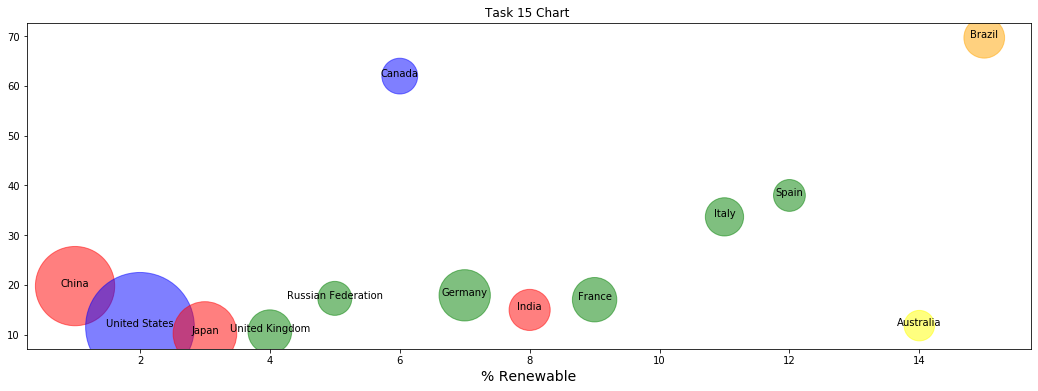

In [31]:
colors = ['red','blue','red','green','green','blue','green','red','green','green','green','green','green','yellow','orange']

plt.figure(figsize = (18,6))
plt.scatter(Dataset['Rank'], Dataset['% Renewable'],s = Dataset['2015']/1400000000, color = colors,alpha = 0.5)

for i in range(len(Dataset)):
    plt.annotate(Dataset.iloc()[i].name, xy =(Dataset.iloc()[i]['Rank'],Dataset.iloc()[i]['% Renewable']),ha='center')
plt.xlabel("Rank",size = 14)
plt.xlabel('% Renewable', size = 14)
plt.title("Task 15 Chart ")
plt.show()